In [1]:
import numpy as np # linear algebra
import ht,pint
import matplotlib.pyplot as plt
from IPython.display import  Latex
ureg = pint.UnitRegistry()#(fmt_locale='es_ES')

In [5]:
ht.conduction.S_isothermal_pipe_to_plane?

   \begin{equation}
   S = \frac{2\pi L}{\operatorname{arcosh}(2z/D)}
   \end{equation}

#### Parameters
----------
D : float
    Diameter of the pipe, [m]
Z : float
    Distance from the middle of the pipe to the infinite plane, [m]
L : float, optional
    Length of the pipe, [m]

 $$Q = Sk(T_1 - T_2) \\ R_{\text{shape}}=\frac{1}{Sk}$$
 
 $$L\gg D$$

In [16]:
def FactorForma(D,z,L):
    S = 2*np.pi*L / (np.arccosh(2*z/D))
    return S

In [24]:
L = 1
D = 0.1
z = 0.5

S1 = FactorForma(D,z,L)

S2 = ht.conduction.S_isothermal_pipe_to_plane(D,z,L)

T_tubo = 10
T_suelo = 20
k_arcilla = 0.48

Q = S1*k_arcilla*(T_suelo-T_tubo)
display('Calor: %.2f w'%Q)

'Calor: 10.08 w'

Text(0, 0.5, 'Flujo de Calor [w/m$^2$]')

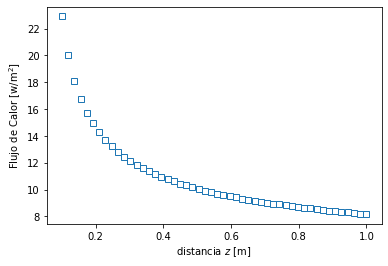

In [33]:
distancias_z = np.linspace(0.1,1,50)
calor = np.zeros_like(distancias_z)

for i,zi in enumerate(distancias_z):
    S1 = ht.conduction.S_isothermal_pipe_to_plane(D,zi,L)
    calor[i] = S1*k_arcilla*(T_suelo-T_tubo)
    
fig0,ax0 = plt.subplots()
ax0.plot(distancias_z,calor,'s',linestyle='',markerfacecolor='None')
    
ax0.set_xlabel('distancia $z$ [m]')
ax0.set_ylabel('Flujo de Calor [w/m$^2$]')

In [28]:
i

NameError: name 'i' is not defined

In [22]:
ht.materials_dict


{'Silica': 1,
 'Silica special': 1,
 'Fused silica': 1,
 'Fireclay': 1,
 'High-duty fireclay': 1,
 'Sillimanite': 1,
 'Mullite': 1,
 'Corundum 90%': 1,
 'Bauxite': 1,
 'Corundum 99%': 1,
 'Corundum Spinel': 1,
 'ACr 90': 1,
 'ACrZ 20': 1,
 'ACrZ 60': 1,
 'Magnesite Chrome': 1,
 'Magnesia': 1,
 'Magnesite Spinel': 1,
 'Magnesite Graphite H15': 1,
 'Dolomite P10': 1,
 'Sillimanite P5': 1,
 'Bauxite P5': 1,
 'Corundum P10': 1,
 'Magnesite P5': 1,
 'Zirconia': 1,
 'Zircon': 1,
 'AZS 41': 1,
 'AZS 33': 1,
 'a/b-Alumina': 1,
 'SIC 40%': 1,
 'SIC 70%': 1,
 'SIC 90%': 1,
 'L1260': 1,
 'L1400': 1,
 'L1540': 1,
 'L1760': 1,
 'L1870': 1,
 'Carbon, anthracite': 1,
 'Carbon, graphite': 1,
 'Board, Asbestos/cement': 2,
 'Board, Cement': 2,
 'Board, Fiber/cement, 1400 kg/m^3': 2,
 'Board, Fiber/cement, 1000 kg/m^3': 2,
 'Board, Fiber/cement, 400 kg/m^3': 2,
 'Board, Fiber/cement, 300 kg/m^3': 2,
 'Gypsum or plaster board': 2,
 'Oriented strand board (OSB)': 2,
 'Plywood (douglas fir)': 2,
 'Plywood/w

### Problema 10
El rotor de una turbina de gas tiene 54 álabes de acero inoxidable AISI 302 de
dimensiones $L= 6$ cm, $A_ c = 4\cdot10^{-4}$ m$^2$ y $P= 0.1$ m. Cuando la corriente de gas está a
900 $^\circ$C, la temperatura de la base de los álabes es de 500 $^\circ$C. Calcule la carga
térmica sobre el sistema de enfriamiento interno del rotor si se admite que el
coeficiente de transferencia de calor por convección es de 440 W/m$^2$ K.

In [25]:
n_alabes = 54

L = 6e-2*ureg.m
A_c = 4e-4*ureg.m**2
P = 0.1*ureg.m
T_gas = (900+273)*ureg.K
T_base = (500+273)*ureg.K
h_conv = 440*ureg.watt/ureg.m**2/ureg.K

In [44]:
L = 6*ureg.cm
display(Latex('$L=$'+f'{L:.1f}'))

<IPython.core.display.Latex object>

\begin{equation}\label{solq}
\dot Q =\frac{\theta_0\alpha P}{\beta} \tanh(\beta L)
\end{equation}

$$\beta^2=\frac{\alpha P}{\lambda S_t}$$

In [26]:
acero_inox = ht.nearest_material('stainless steel')
k_acero_inox = ht.k_material(acero_inox)*ureg.watt/ureg.m/ureg.K

In [27]:

theta_0 = T_gas-T_base
beta = (h_conv*P/(k_acero_inox*A_c) )**0.5

In [28]:
display(Latex(r'$\beta$='+f' {beta:~.1f}'))
display(Latex(r'$\beta L$='+f' {(beta*L):~.2f}'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [38]:
Q = theta_0*h_conv*P*np.tanh(beta*L)/beta
display(Latex(r'$\dot Q$='+f' {Q:~.1f}'))
Qtotal = Q*n_alabes
display(Latex(r'$\dot Q_{T}$='+f' {Qtotal.to(ureg.kW):~.1f}'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [31]:
lista_materiales = ht.insulation.materials_dict

11.813504271265773 <Unit('kilowatt')>

In [33]:
lista_materiales

{'Silica': 1,
 'Silica special': 1,
 'Fused silica': 1,
 'Fireclay': 1,
 'High-duty fireclay': 1,
 'Sillimanite': 1,
 'Mullite': 1,
 'Corundum 90%': 1,
 'Bauxite': 1,
 'Corundum 99%': 1,
 'Corundum Spinel': 1,
 'ACr 90': 1,
 'ACrZ 20': 1,
 'ACrZ 60': 1,
 'Magnesite Chrome': 1,
 'Magnesia': 1,
 'Magnesite Spinel': 1,
 'Magnesite Graphite H15': 1,
 'Dolomite P10': 1,
 'Sillimanite P5': 1,
 'Bauxite P5': 1,
 'Corundum P10': 1,
 'Magnesite P5': 1,
 'Zirconia': 1,
 'Zircon': 1,
 'AZS 41': 1,
 'AZS 33': 1,
 'a/b-Alumina': 1,
 'SIC 40%': 1,
 'SIC 70%': 1,
 'SIC 90%': 1,
 'L1260': 1,
 'L1400': 1,
 'L1540': 1,
 'L1760': 1,
 'L1870': 1,
 'Carbon, anthracite': 1,
 'Carbon, graphite': 1,
 'Board, Asbestos/cement': 2,
 'Board, Cement': 2,
 'Board, Fiber/cement, 1400 kg/m^3': 2,
 'Board, Fiber/cement, 1000 kg/m^3': 2,
 'Board, Fiber/cement, 400 kg/m^3': 2,
 'Board, Fiber/cement, 300 kg/m^3': 2,
 'Gypsum or plaster board': 2,
 'Oriented strand board (OSB)': 2,
 'Plywood (douglas fir)': 2,
 'Plywood/w

In [45]:
ht.conv_internal.turbulent_Colburn?

 $0.023Re^{0.8}Pr^{1/3}$

In [52]:
Re = 1e4
Pr =  20.8

Nu = ht.conv_internal.turbulent_Colburn(Re,Pr)
Nu_2 = 0.023*Re**.8*Pr**(.4)

In [53]:
Nu,Nu_2

(100.24951518318703, 122.73068834558643)